In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covidtest/covid_data.csv
/kaggle/input/covidtest/cardio_base.csv
/kaggle/input/covidtest/cardio_alco.csv


# First dataset

In [2]:
cardio_base_df = pd.read_csv('/kaggle/input/covidtest/cardio_base.csv')
cardio_base_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0


In [3]:
cardio_base_df['age'] = (cardio_base_df['age'] / 365).astype(int)
cardio_base_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,50,2,168,62.0,110,80,1,0
1,1,55,1,156,85.0,140,90,3,0
2,2,51,1,165,64.0,130,70,3,0
3,3,48,2,169,82.0,150,100,1,0
4,4,47,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1
69996,99995,61,1,158,126.0,140,90,2,0
69997,99996,52,2,183,105.0,180,90,3,0
69998,99998,61,1,163,72.0,135,80,1,0


How much heavier the age group with the highest average weight than the age group with the lowest weight?

In [4]:
avg_weight_by_age = cardio_base_df.groupby('age').agg({'weight': 'mean'})
avg_weight_by_age.max() / avg_weight_by_age.min() - 1

weight    0.285995
dtype: float64

Do people over 50 have higher cholesterol levels than the rest?

In [5]:
avg_cholesterol_by_age = cardio_base_df.groupby('age').agg({'cholesterol': 'mean'})
avg_cholesterol_by_age[avg_cholesterol_by_age.index > 50].mean() / avg_cholesterol_by_age[avg_cholesterol_by_age.index <= 50].mean() - 1

cholesterol    0.195108
dtype: float64

Are men more likely to be a smoker than women?

In [6]:
num_smoker_by_gender = cardio_base_df.groupby('gender').agg({'smoke': 'sum'})
# num_smoker_by_gender
# num_smoker_by_gender[num_smoker_by_gender.index == 1]['smoke']
num_smoker_by_gender[num_smoker_by_gender.index == 2]['smoke'].item() / num_smoker_by_gender[num_smoker_by_gender.index == 1]['smoke'].item()

6.587945879458794

How tall are the tallest 1% of people

In [7]:
cardio_base_df['height'].quantile(0.99)

184.0

Which two features have the highest spearman rank correlation?

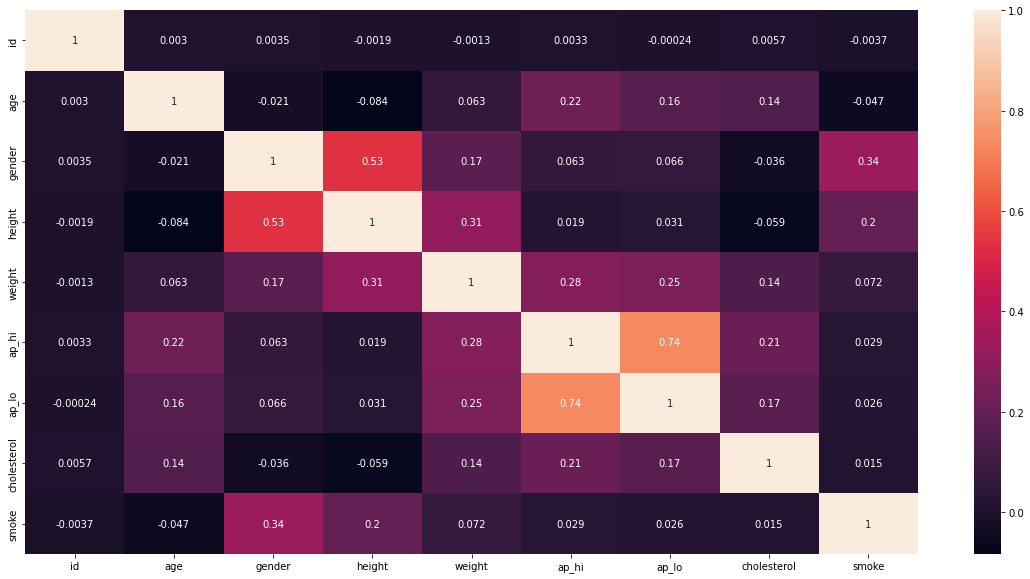

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
corr = cardio_base_df.corr(method = 'spearman')
sns.heatmap(corr, annot = True)
plt.show()

What percentage of people are more than 2 standard deviations far from the average height?

In [9]:
height_avg = cardio_base_df.height.mean()
height_std = cardio_base_df.height.std()
len(cardio_base_df[abs(cardio_base_df.height - height_avg) > 2 * height_std]) / len(cardio_base_df.height)

0.033357142857142856

What percentage of the population over 50 years old consume alcohol?
Ignore those persons, where we have no alcohol sonsumption information!

In [10]:
cardio_alco_df = pd.read_csv('/kaggle/input/covidtest/cardio_alco.csv', sep=';')
cardio_alco_df

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0
...,...,...
56898,99949,0
56899,99950,0
56900,99951,0
56901,99952,0


In [11]:
cardio_merged_df = pd.merge(cardio_base_df, cardio_alco_df, on='id')
cardio_merged_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,44,40,1,159,60.0,110,70,1,0,0
1,45,56,1,160,73.0,130,85,1,0,0
2,46,60,2,173,82.0,140,90,3,0,0
3,47,55,1,163,55.0,120,80,1,0,0
4,49,50,2,175,95.0,120,80,1,0,0
...,...,...,...,...,...,...,...,...,...,...
56898,99949,57,1,178,69.0,130,90,1,0,0
56899,99950,53,2,155,76.0,130,90,1,0,0
56900,99951,61,2,170,72.0,120,80,1,0,0
56901,99952,42,2,165,66.0,120,80,1,0,0


In [12]:
cardio_over_50_df = cardio_merged_df[cardio_merged_df['age'] > 50]
# cardio_over_50_df
len(cardio_over_50_df[cardio_over_50_df['alco'] == 1]) / len(cardio_over_50_df)

0.049086076910560286

Which of the following statements is true with 95% confidence?
- Smokers have higher blood presure than non-smokers
- Smokers have higher cholesterol level than non-smokers
- Smokers weight less than non smokers
- Men have higher blood pressure than women

In [13]:
cardio_base_df['ap_mean'] = (cardio_base_df['ap_hi'] + cardio_base_df['ap_lo']) / 2
cardio_base_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,ap_mean
0,0,50,2,168,62.0,110,80,1,0,95.0
1,1,55,1,156,85.0,140,90,3,0,115.0
2,2,51,1,165,64.0,130,70,3,0,100.0
3,3,48,2,169,82.0,150,100,1,0,125.0
4,4,47,1,156,56.0,100,60,1,0,80.0
...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,100.0
69996,99995,61,1,158,126.0,140,90,2,0,115.0
69997,99996,52,2,183,105.0,180,90,3,0,135.0
69998,99998,61,1,163,72.0,135,80,1,0,107.5


In [14]:
stat_ap_mean_by_smoke_df = cardio_base_df.groupby('smoke')['ap_mean'].agg(['mean', 'sem'])
stat_ap_mean_by_smoke_df['ci95_hi'] = stat_ap_mean_by_smoke_df['mean'] + 1.96 * stat_ap_mean_by_smoke_df['sem']
stat_ap_mean_by_smoke_df['ci95_lo'] = stat_ap_mean_by_smoke_df['mean'] - 1.96 * stat_ap_mean_by_smoke_df['sem']
stat_ap_mean_by_smoke_df

,mean,sem,ci95_hi,ci95_lo
smoke,,,,
0,112.593990,0.497122,113.568349,111.619631
1,114.067515,1.101288,116.226040,111.908990


In [15]:
stat_cholesterol_by_smoke_df = cardio_base_df.groupby('smoke')['cholesterol'].agg(['mean', 'sem'])
stat_cholesterol_by_smoke_df['ci95_hi'] = stat_cholesterol_by_smoke_df['mean'] + 1.96 * stat_cholesterol_by_smoke_df['sem']
stat_cholesterol_by_smoke_df['ci95_lo'] = stat_cholesterol_by_smoke_df['mean'] - 1.96 * stat_cholesterol_by_smoke_df['sem']
stat_cholesterol_by_smoke_df

,mean,sem,ci95_hi,ci95_lo
smoke,,,,
0,1.364682,0.002692,1.369958,1.359405
1,1.389528,0.008671,1.406524,1.372533


In [16]:
stat_weight_by_smoke_df = cardio_base_df.groupby('smoke')['weight'].agg(['mean', 'sem'])
stat_weight_by_smoke_df['ci95_hi'] = stat_weight_by_smoke_df['mean'] + 1.96 * stat_weight_by_smoke_df['sem']
stat_weight_by_smoke_df['ci95_lo'] = stat_weight_by_smoke_df['mean'] - 1.96 * stat_weight_by_smoke_df['sem']
stat_weight_by_smoke_df

,mean,sem,ci95_hi,ci95_lo
smoke,,,,
0,73.902352,0.056594,74.013275,73.791428
1,77.344351,0.191148,77.719001,76.969700


In [17]:
stat_ap_mean_by_gender_df = cardio_base_df.groupby('gender')['ap_mean'].agg(['mean', 'sem'])
stat_ap_mean_by_gender_df['ci95_hi'] = stat_ap_mean_by_gender_df['mean'] + 1.96 * stat_ap_mean_by_gender_df['sem']
stat_ap_mean_by_gender_df['ci95_lo'] = stat_ap_mean_by_gender_df['mean'] - 1.96 * stat_ap_mean_by_gender_df['sem']
stat_ap_mean_by_gender_df

,mean,sem,ci95_hi,ci95_lo
gender,,,,
1,111.331013,0.556746,112.422235,110.23979
2,115.315427,0.827759,116.937834,113.69302


# Second Dataset, Covid19 cases

In [18]:
covid_df = pd.read_csv('/kaggle/input/covidtest/covid_data.csv')
covid_df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


When did the difference in total number of confirmed cases between Italy and Germany become more than 10000?

In [19]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [20]:
germany_covid_df = covid_df[covid_df.location == "Germany"]
italy_covid_df = covid_df[covid_df.location == "Italy"]

In [21]:
germany_covid_df["cumsum"] = germany_covid_df.new_cases.cumsum()
italy_covid_df["cumsum"] = italy_covid_df.new_cases.cumsum()
gr_it = pd.merge(germany_covid_df, italy_covid_df, on='date')
gr_it

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,location_x,date,new_cases_x,new_deaths_x,population_x,aged_65_older_percent_x,gdp_per_capita_x,hospital_beds_per_thousand_x,cumsum_x,location_y,new_cases_y,new_deaths_y,population_y,aged_65_older_percent_y,gdp_per_capita_y,hospital_beds_per_thousand_y,cumsum_y
0,Germany,2019-12-31,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
1,Germany,2020-01-01,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
2,Germany,2020-01-02,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
3,Germany,2020-01-03,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
4,Germany,2020-01-04,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Germany,2020-06-06,407,33,83783945.0,21.453,45229.245,8.0,183678,Italy,518,85,60461828.0,23.021,35220.084,3.18,234531
159,Germany,2020-06-07,301,22,83783945.0,21.453,45229.245,8.0,183979,Italy,270,72,60461828.0,23.021,35220.084,3.18,234801
160,Germany,2020-06-08,214,6,83783945.0,21.453,45229.245,8.0,184193,Italy,197,53,60461828.0,23.021,35220.084,3.18,234998
161,Germany,2020-06-09,350,37,83783945.0,21.453,45229.245,8.0,184543,Italy,280,65,60461828.0,23.021,35220.084,3.18,235278


In [22]:
gr_it[abs(gr_it.cumsum_x - gr_it.cumsum_y) > 10000]['date'].min()

Timestamp('2020-03-12 00:00:00')

Look at the cumulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20. Fit an exponential function (y = Ae^(Bx)) to this set to express cumulative cases as a function of days passed, by minimizing squared loss.
What is the difference between the exponential curve and the total number of real cases on 2020-03-20?

<AxesSubplot:xlabel='date', ylabel='cumsum'>

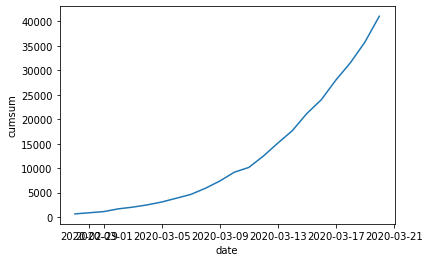

In [23]:
italy_cumsum_case_in_time_df = italy_covid_df[(italy_covid_df.date >= "2020-02-28") & (italy_covid_df.date <= "2020-03-20")]
sns.lineplot(data=italy_cumsum_case_in_time_df, x='date', y='cumsum')

In [24]:
italy_cumsum_case_in_time_df['ts'] = italy_cumsum_case_in_time_df.date.astype('int64') // 10**9
italy_cumsum_case_in_time_df['ts'] -= italy_cumsum_case_in_time_df['ts'].min()
x = italy_cumsum_case_in_time_df['ts']
y = italy_cumsum_case_in_time_df['cumsum']
p = np.polyfit(x, np.log(y), 1)
print(p)
# Convert the polynomial back into an exponential
a = np.exp(p[1])
b = p[0]
print(a, b)
y_fitted = a * np.exp(b * x)
# y_fitted

[2.24520424e-06 6.80040490e+00]
898.2109026485607 2.245204241243904e-06


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

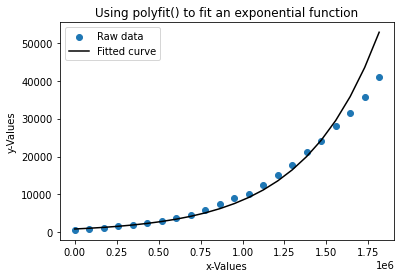

In [25]:
ax = plt.axes()
ax.scatter(x, y, label='Raw data')
ax.plot(x, y_fitted, 'k', label='Fitted curve')
ax.set_title('Using polyfit() to fit an exponential function')
ax.set_ylabel('y-Values')
ax.set_xlabel('x-Values')
ax.legend()

In [26]:
italy_data_2020_03_20 = italy_cumsum_case_in_time_df[italy_cumsum_case_in_time_df['date'] == '2020-03-20']
italy_data_2020_03_20

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,cumsum,ts
10768,Italy,2020-03-20,5322,429,60461828.0,23.021,35220.084,3.18,41035,1814400


In [27]:
x_test = italy_data_2020_03_20['ts'].item()
y_test = italy_data_2020_03_20['cumsum'].item()
y_pred = a * np.exp(b * x_test)
print(x_test, y_test, y_pred)
print(y_pred - y_test)

1814400 41035 52791.394540484864
11756.394540484864


Which country has the 3rd highest death rate? Death rate: total number of death per million inhabitants.

In [28]:
country_death_rate_df = covid_df.groupby('location').agg({'new_deaths': 'sum', 'population': 'mean', 'aged_65_older_percent': 'first'})
country_death_rate_df['death_rate'] = country_death_rate_df['new_deaths'] / country_death_rate_df['population'] * 1000000
country_death_rate_df.sort_values(by='death_rate', ascending=False)

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
San Marino,42,33938.0,NaN,1237.550828
Belgium,9619,11589616.0,18.571,829.967102
Andorra,51,77265.0,NaN,660.066007
United Kingdom,40883,67886004.0,18.517,602.230174
Spain,27136,46754783.0,19.436,580.389818
...,...,...,...,...
French Polynesia,0,280904.0,7.775,0.000000
Fiji,0,896444.0,6.224,0.000000
Mongolia,0,3278292.0,4.031,0.000000


What is the F1 score of the following statement:
Countries, where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants.
Ignore countries, where any of the neccessary information is missing!

In [29]:
country_death_rate_dropna_df = country_death_rate_df.dropna()
country_death_rate_dropna_df

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Afghanistan,384,3.892834e+07,2.581,9.864279
Albania,34,2.877800e+06,13.188,11.814581
Algeria,724,4.385104e+07,6.211,16.510440
Angola,4,3.286627e+07,2.405,0.121705
Antigua and Barbuda,3,9.792800e+04,6.933,30.634752
...,...,...,...,...
Vietnam,0,9.733858e+07,7.150,0.000000
World,411195,7.794799e+09,8.696,52.752485
Yemen,127,2.982597e+07,2.922,4.258034


In [30]:
country_aged_65_over_20_percent = country_death_rate_dropna_df[country_death_rate_dropna_df.aged_65_older_percent > 20]
country_aged_65_over_20_percent

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Bulgaria,167,6948445.0,20.801,24.034154
Finland,324,5540718.0,21.228,58.476176
Germany,8729,83783945.0,21.453,104.184638
Greece,183,10423056.0,20.396,17.557231
Italy,34043,60461828.0,23.021,563.049467
Japan,919,126476458.0,27.049,7.266174
Portugal,1492,10196707.0,21.502,146.321749


In [31]:
country_aged_65_over_20_percent_death_rate_over_50_per_million = country_aged_65_over_20_percent[country_aged_65_over_20_percent.death_rate > 50]
country_aged_65_over_20_percent_death_rate_over_50_per_million

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Finland,324,5540718.0,21.228,58.476176
Germany,8729,83783945.0,21.453,104.184638
Italy,34043,60461828.0,23.021,563.049467
Portugal,1492,10196707.0,21.502,146.321749


In [32]:
from sklearn.metrics import f1_score
y_pred = [1] * len(country_aged_65_over_20_percent)
y_true = [1] * len(country_aged_65_over_20_percent_death_rate_over_50_per_million) + [0] * (len(country_aged_65_over_20_percent) - len(country_aged_65_over_20_percent_death_rate_over_50_per_million))
f1_score(y_true, y_pred)

0.7272727272727273

What is the probability that a country has GDP over $10000, if we known that they have at least 5 hospital beds per 1000 inhabitants.

In [33]:
gdp_beds_by_country_df = covid_df.groupby('location')['gdp_per_capita', 'hospital_beds_per_thousand'].agg('first').dropna()
gdp_beds_by_country_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,gdp_per_capita,hospital_beds_per_thousand
location,,
Afghanistan,1803.987,0.500
Albania,11803.431,2.890
Algeria,13913.839,1.900
Antigua and Barbuda,21490.943,3.800
Argentina,18933.907,5.000
...,...,...
Vietnam,6171.884,2.600
World,15469.207,2.705
Yemen,1479.147,0.700


In [34]:
country_at_least_5_beds_per_thousand_hospitals = gdp_beds_by_country_df[gdp_beds_by_country_df.hospital_beds_per_thousand >= 5]
country_at_least_5_beds_gdp_over_10000 = country_at_least_5_beds_per_thousand_hospitals[country_at_least_5_beds_per_thousand_hospitals.gdp_per_capita > 10000]
# country_at_least_5_beds_per_thousand_hospitals
len(country_at_least_5_beds_gdp_over_10000)/len(country_at_least_5_beds_per_thousand_hospitals)

0.8846153846153846